In [1]:
# pandas - numpy - matplotlib - seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/fake_customer_data_with_errors.csv')

# 1- Explore Data


In [6]:
#df.head()
#df.tail()
df.sample(6)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
958,CUST1958,Lina Smith,-1.0,female,lina.smith@gmail.com,123456789.0,928.11,32/13/2020,NaN,NaN,NaN,female
974,CUST1974,Lina Ibrahim,NaN,female,lina.ibrahim@gmail.com,123456789.0,943.36,2025-03-13,Books,3.0,NaN,female
1808,CUST2808,Fatma Mahmoud,87.0,M,fatma.mahmoud@yahoo.com,987654321.0,575.52,2024-11-30,NaN,NaN,NaN,M
295,CUST1295,Ali Hassan,NaN,F,ali.hassan@yahoo.com,123456789.0,97.91,2022-11-22,Electronics,3.0,NaN,F
275,CUST1275,Ali Mahmoud,200.0,Female,ali.mahmoud@yahoo.com,NaN,449.84,2025-07-10,NaN,4.0,NaN,Female
857,CUST1857,Alaa Mahmoud,-1.0,M,alaa.mahmoud@yahoo.com,NaN,123.28,2024-01-27,Toys,10.0,NaN,M


In [7]:
df.shape

(2150, 12)

In [8]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Email', 'Phone',
       'PurchaseAmount', 'PurchaseDate', 'ProductCategory', 'Rating',
       'Unnamed', '  Gender  '],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       2100 non-null   object        
 1   Name             2100 non-null   object        
 2   Age              2100 non-null   float64       
 3   Gender           2100 non-null   object        
 4   Email            2100 non-null   object        
 5   Phone            1043 non-null   float64       
 6   PurchaseAmount   2003 non-null   float64       
 7   PurchaseDate     1982 non-null   datetime64[ns]
 8   ProductCategory  2100 non-null   object        
 9   Rating           1778 non-null   float64       
 10  Add              2100 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 196.9+ KB


In [11]:
df.duplicated().sum()

np.int64(50)

In [12]:
df.nunique()

,0
CustomerID,2100
Name,48
Age,78
Gender,6
Email,144
Phone,2
PurchaseAmount,1991
PurchaseDate,860
ProductCategory,5
Rating,6


In [15]:
#df.isnull().sum()
df.isna().sum()

,0
CustomerID,0
Name,0
Age,520
Gender,273
Email,0
Phone,1078
PurchaseAmount,101
PurchaseDate,0
ProductCategory,577
Rating,329


In [16]:
df.describe()

,Age,Phone,PurchaseAmount,Rating,Unnamed
count,1630.000000,1.072000e+03,2049.000000,1821.000000,0.0
mean,85.180982,5.668417e+08,509.418882,4.183416,NaN
std,86.794111,4.321530e+08,288.257697,2.871300,NaN
min,-1.000000,1.234568e+08,5.060000,1.000000,NaN
25%,-1.000000,1.234568e+08,263.680000,2.000000,NaN
50%,54.000000,9.876543e+08,519.250000,3.000000,NaN
75%,200.000000,9.876543e+08,762.910000,5.000000,NaN
max,200.000000,9.876543e+08,999.560000,10.000000,NaN


# 2- Clean Data


In [17]:
df=df.drop(columns=['Unnamed', '  Gender  '])

In [19]:
df.head(3)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0


In [20]:
df['Add']=1

In [23]:
df.sample(6)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
676,CUST1676,Mark Ali,200.0,male,mark.ali@gmail.com,123456789.0,842.36,2024-05-12,Home,10.0,1
2006,CUST3006,John Ibrahim,200.0,Female,john.ibrahim@hotmail.com,NaN,607.52,2024-02-09,Toys,NaN,1
267,CUST1267,John Ibrahim,200.0,female,john.ibrahim@yahoo.com,987654321.0,105.11,2024-10-28,NaN,3.0,1
300,CUST1300,Alaa Smith,200.0,M,alaa.smith@hotmail.com,987654321.0,701.82,2025-03-21,Home,5.0,1
97,CUST1097,Sara Ali,200.0,male,sara.ali@yahoo.com,NaN,290.07,2023-06-14,Home,NaN,1
967,CUST1967,Ali Smith,200.0,male,ali.smith@gmail.com,987654321.0,199.73,2024-08-15,Clothing,10.0,1


In [24]:
#df.drop_duplicates(inplace=True)
df=df.drop_duplicates()

In [25]:
df.shape

(2100, 11)

In [26]:
df['Gender'].unique()

array([nan, 'Female', 'male', 'F', 'M', 'female', 'Male'], dtype=object)

In [27]:
df['Gender']=df['Gender'].str.lower()

In [31]:
df['Gender'].replace({'m':'Male','f':'female','Male':'male'},inplace=True)

In [33]:
df['Gender'].fillna('male',inplace=True)

In [35]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-35-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [37]:
df['ProductCategory']=df['ProductCategory'].fillna('Unknown')

In [39]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'],errors='coerce')

In [42]:
df['Age']=df['Age'].apply(lambda x:df['Age'].mean() if x<0 else x)

In [ ]:
df=df.dropna()

# 3- Data Analysis


In [47]:
df.sort_values(by=['PurchaseAmount','Rating'],ascending=False).head(10)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
687,CUST1687,Alaa Ibrahim,200.000000,female,alaa.ibrahim@yahoo.com,123456789.0,999.56,2025-05-16,Electronics,1.0,1
1949,CUST2949,Fatma Mahmoud,63.000000,female,fatma.mahmoud@yahoo.com,NaN,999.30,2024-04-10,Clothing,3.0,1
424,CUST1424,John Ali,80.000000,male,john.ali@gmail.com,987654321.0,999.23,2024-06-30,Toys,5.0,1
1832,CUST2832,John Ali,49.000000,male,john.ali@yahoo.com,NaN,999.00,2024-10-10,Toys,1.0,1
1961,CUST2961,Mark Mahmoud,85.044542,male,mark.mahmoud@yahoo.com,NaN,998.59,2025-04-25,Electronics,2.0,1
631,CUST1631,Lina Mahmoud,18.000000,female,lina.mahmoud@gmail.com,NaN,998.16,2023-10-09,Books,5.0,1
386,CUST1386,Fatma Ali,200.000000,female,fatma.ali@hotmail.com,123456789.0,995.55,2022-11-12,Clothing,4.0,1
335,CUST1335,Alaa Mahmoud,85.044542,female,alaa.mahmoud@yahoo.com,123456789.0,995.41,2024-02-11,Toys,3.0,1
908,CUST1908,Sara Ali,85.044542,female,sara.ali@yahoo.com,NaN,995.32,2023-09-04,Clothing,1.0,1
1708,CUST2708,Sara Hassan,85.044542,female,sara.hassan@yahoo.com,NaN,995.25,2023-05-17,Electronics,NaN,1


In [48]:
df['ProductCategory'].value_counts()

,count
ProductCategory,
Unknown,565
Clothing,323
Electronics,323
Books,305
Home,296
Toys,288


In [50]:
df['Rating'].value_counts().sort_index()

,count
Rating,
1.0,266
2.0,310
3.0,326
4.0,278
5.0,307
10.0,291


In [60]:
gender_counts=df['Gender'].value_counts()
gender_counts

,count
Gender,
male,1209
female,891


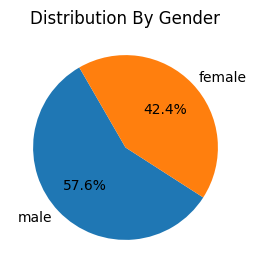

In [65]:
plt.figure(figsize=(3,3))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=120)
plt.title('Distribution By Gender')
plt.show()

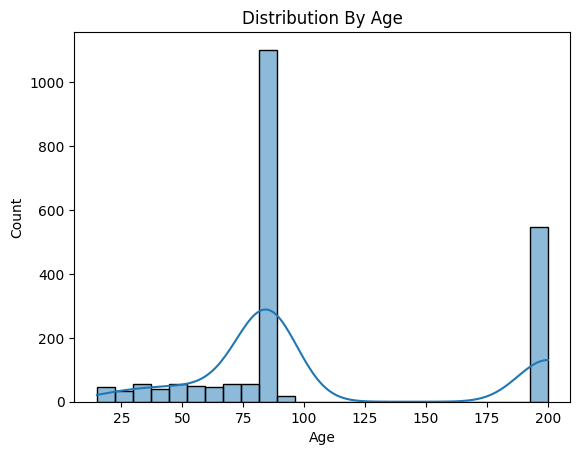

In [74]:
sns.histplot(df['Age'],bins=25,kde=True)
plt.title('Distribution By Age')
plt.show()

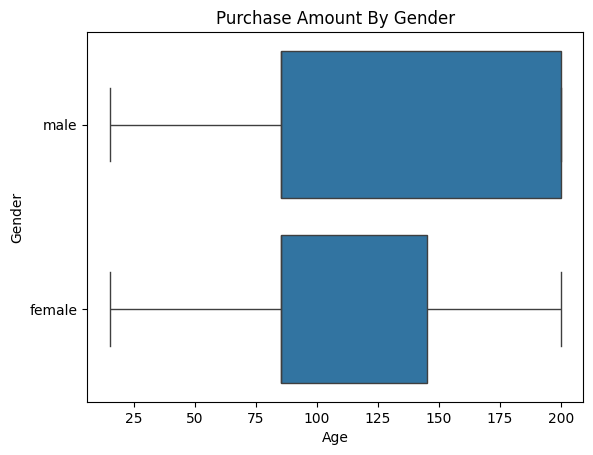

In [79]:
sns.boxplot(data=df,x='Age',y='Gender')
plt.title('Purchase Amount By Gender')
plt.show()

In [82]:
corr=df[['Age','Rating','PurchaseAmount']].corr()

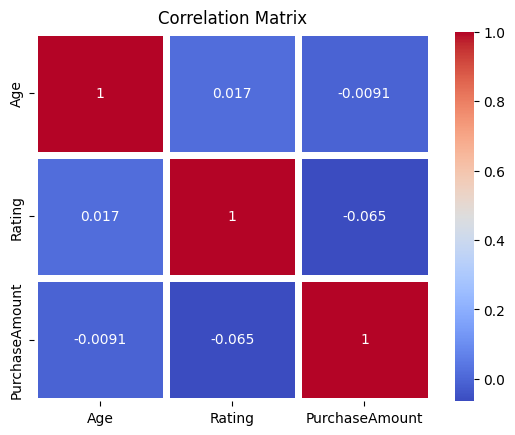

In [87]:
sns.heatmap(corr,annot=True,linewidths=5,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

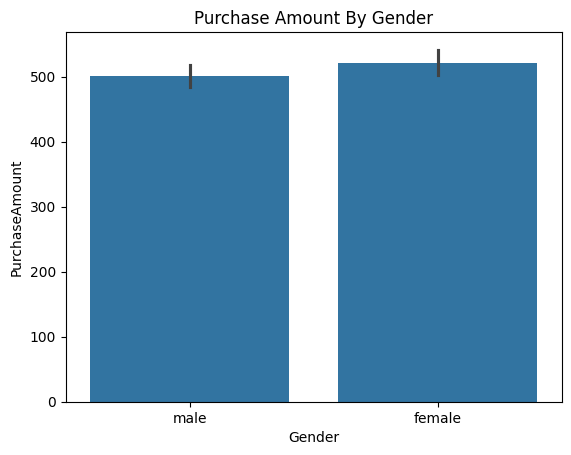

In [89]:
sns.barplot(data=df,x='Gender',y='PurchaseAmount',estimator='mean')
plt.title('Purchase Amount By Gender')
plt.show()

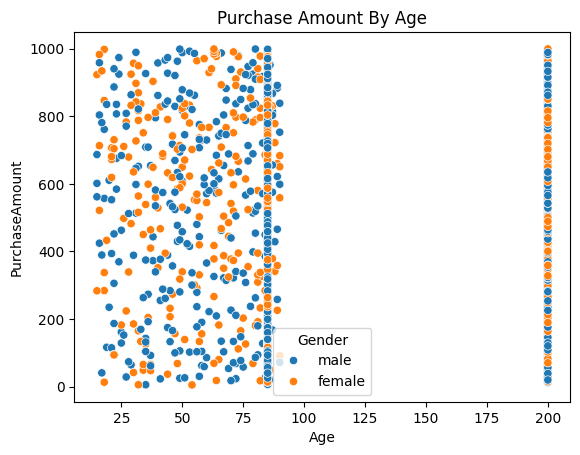

In [91]:
sns.scatterplot(data=df,x='Age',y='PurchaseAmount',hue='Gender')
plt.title('Purchase Amount By Age')
plt.show()

In [92]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])

In [93]:
df['Month']=df['PurchaseDate'].dt.month

In [94]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add,Month
0,CUST1000,Ali Hassan,72.000000,male,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,1,10.0
1,CUST1001,Fatma Ali,85.044542,female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,Unknown,3.0,1,2.0
2,CUST1002,Ahmed Mahmoud,85.044542,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,1,7.0
3,CUST1003,Ahmed Gaber,85.044542,female,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,Unknown,2.0,1,12.0
4,CUST1004,Ali Ibrahim,73.000000,male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,1,12.0


In [96]:
monthly_sales=df.groupby('Month')['PurchaseAmount'].sum()

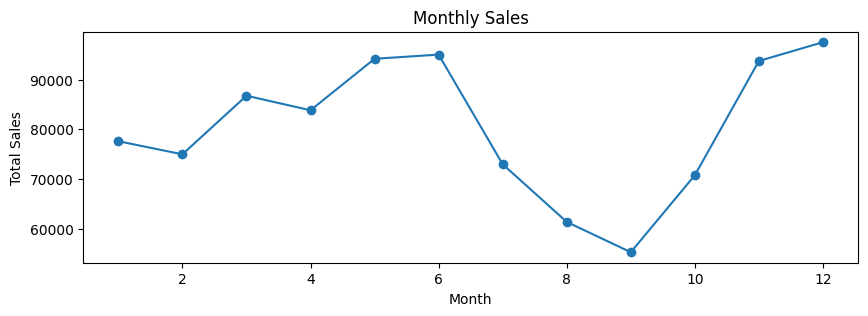

In [105]:
monthly_sales.plot(figsize=(10,3),kind='line',marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [106]:
df.to_csv('Clean_Data_2025',index=False)